
# 📈 Stock Market Forecasting using Time Series Models

## 🔍 Objective
To forecast stock market prices using classical and deep learning-based time series models:
- **ARIMA**
- **SARIMA**
- **LSTM**
- **Facebook Prophet**

## 📚 Table of Contents
1. [Introduction](#introduction)
2. [Data Collection](#data-collection)
3. [Data Preprocessing](#data-preprocessing)
4. [Exploratory Data Analysis](#exploratory-data-analysis)
5. [Modeling Approaches](#modeling-approaches)
   - [ARIMA](#1-arima)
   - [SARIMA](#2-sarima)
   - [LSTM](#3-lstm)
   - [Prophet](#4-prophet)
6. [Evaluation Metrics](#evaluation-metrics)
7. [Results and Comparisons](#results-and-comparisons)
8. [Conclusion](#conclusion)
9. [References](#references)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [13]:
df=pd.read_csv("apple_data.csv")
# Ensure Date column is datetime
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.head()

,Date,Close,High,Low,Open,Volume
0,1980-12-12,0.098597,0.099025,0.098597,0.098597,469033600
1,1980-12-15,0.093453,0.093881,0.093453,0.093881,175884800
2,1980-12-16,0.086594,0.087022,0.086594,0.087022,105728000
3,1980-12-17,0.088737,0.089165,0.088737,0.088737,86441600
4,1980-12-18,0.091310,0.091738,0.091310,0.091310,73449600


In [15]:
df.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [16]:
df.shape

(11226, 6)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11226 entries, 0 to 11225
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    11226 non-null  datetime64[ns]
 1   Close   11226 non-null  float64       
 2   High    11226 non-null  float64       
 3   Low     11226 non-null  float64       
 4   Open    11226 non-null  float64       
 5   Volume  11226 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 526.3 KB


In [18]:
df.duplicated().sum()

0

### ✅ 1. Line Plot (Close Price Over Time)

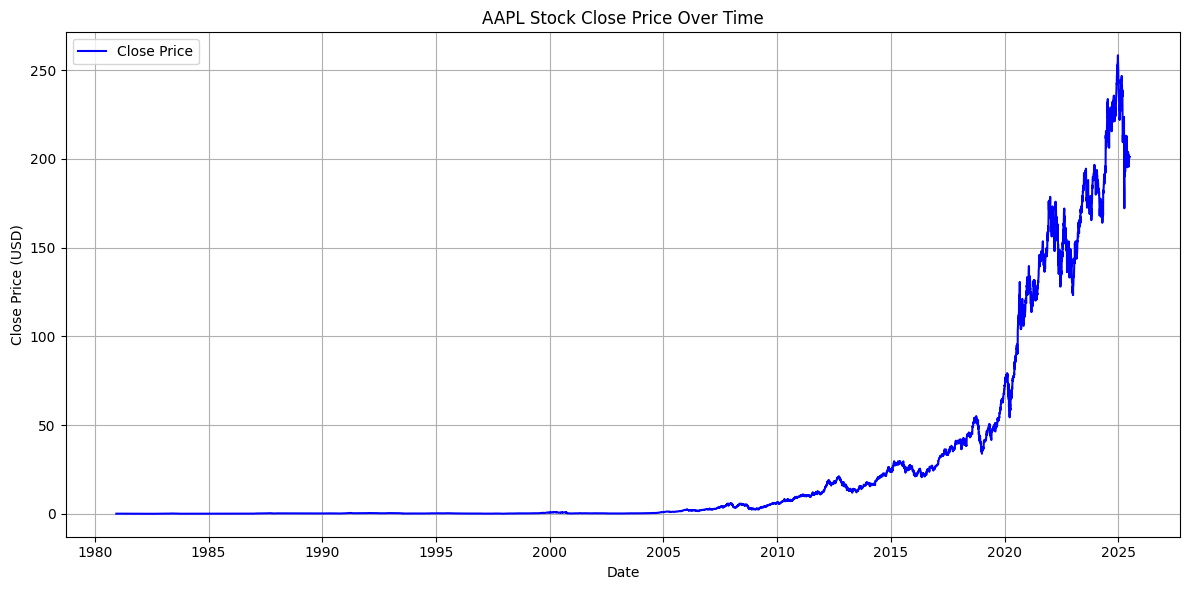

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('AAPL Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### ✅ 2. Candlestick Chart (Open, High, Low, Close)

In [20]:
# import plotly.graph_objects as go

# fig = go.Figure(data=[go.Candlestick(x=df.index,
#                 open=df['Open'],
#                 high=df['High'],
#                 low=df['Low'],
#                 close=df['Close'])])

# fig.update_layout(title='AAPL Candlestick Chart',
#                   xaxis_title='Date',
#                   yaxis_title='Price (USD)',
#                   xaxis_rangeslider_visible=False)

# fig.show()


### ✅ 3. Volume Over Time

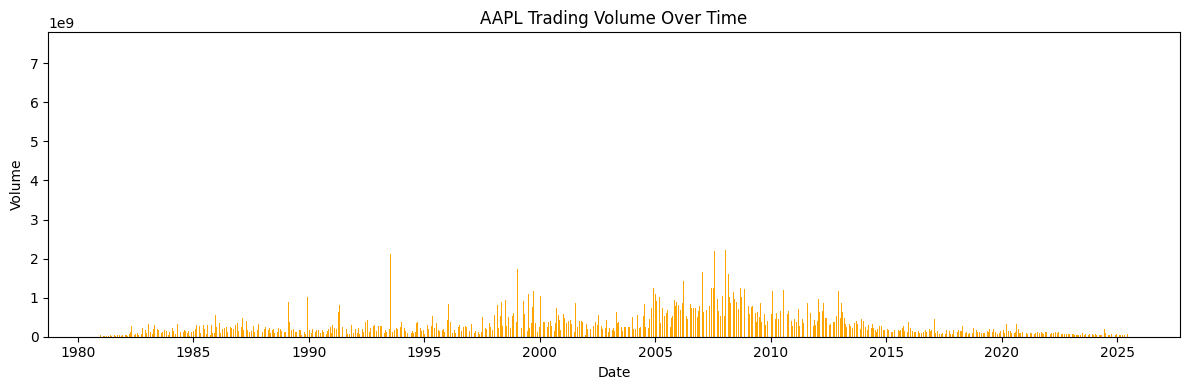

In [21]:
plt.figure(figsize=(12, 4))
plt.bar(df['Date'], df['Volume'], color='orange')
plt.title('AAPL Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()


### ✅ 4. Moving Averages

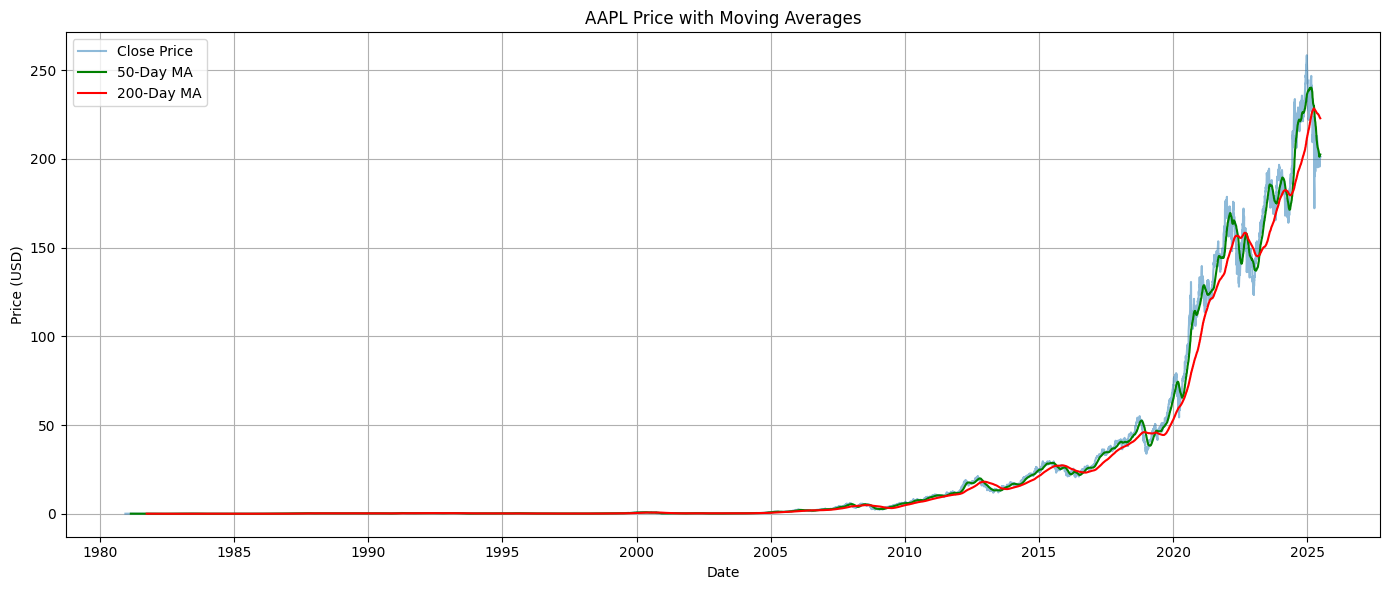

In [22]:
# Add moving averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['Date'], df['MA50'], label='50-Day MA', color='green')
plt.plot(df['Date'], df['MA200'], label='200-Day MA', color='red')
plt.title('AAPL Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### ✅ 5. Correlation Heatmap

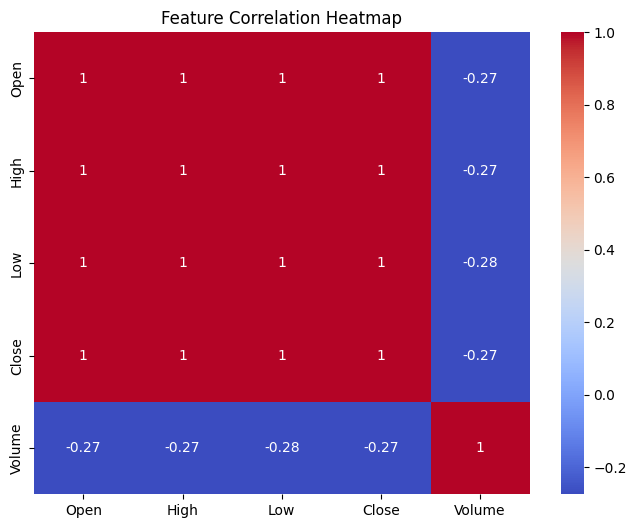

In [23]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


## LSTM model

In [24]:
data=df

In [26]:
import os
import numpy as np
import pandas as pd
import pickle
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense

# 📁 Ensure the 'models' directory exists
os.makedirs('models', exist_ok=True)

# 📥 Load and preprocess data
data = pd.read_csv('apple_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Scale the 'Close' prices
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Close']])

# 💾 Save the scaler for future use
with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# 📚 Create dataset sequences
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape input to [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# 🧠 Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=64))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# 🏋️ Train the model
model.fit(X, y, epochs=30, batch_size=32, verbose=1)

# 💾 Save the model
model_path = 'models/lstm_model.h5'
model.save(model_path)
print(f"✅ Model saved to: {model_path}")

# ✅ Test model loading
try:
    loaded_model = load_model(model_path)
    print("✅ Model loaded successfully.")
except Exception as e:
    print(f"❌ Error loading model: {e}")


Epoch 1/30
349/349 [==============================] - 26s 58ms/step - loss: 7.6755e-04
Epoch 2/30
349/349 [==============================] - 20s 56ms/step - loss: 1.1749e-04
Epoch 3/30
349/349 [==============================] - 20s 57ms/step - loss: 8.6195e-05
Epoch 4/30
349/349 [==============================] - 21s 59ms/step - loss: 8.4360e-05
Epoch 5/30
349/349 [==============================] - 19s 54ms/step - loss: 7.5282e-05
Epoch 6/30
349/349 [==============================] - 19s 55ms/step - loss: 7.3105e-05
Epoch 7/30
349/349 [==============================] - 19s 55ms/step - loss: 7.7278e-05
Epoch 8/30
349/349 [==============================] - 19s 53ms/step - loss: 4.2762e-05
Epoch 9/30
349/349 [==============================] - 19s 56ms/step - loss: 4.8965e-05
Epoch 10/30
349/349 [==============================] - 22s 63ms/step - loss: 4.6244e-05
Epoch 11/30
349/349 [==============================] - 19s 55ms/step - loss: 4.1496e-05
Epoch 12/30
349/349 [====================

## Aarima -Sarima 

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=13.63 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=41095.734, Time=0.27 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=37631.822, Time=0.72 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=8.78 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=41093.734, Time=0.23 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=36644.183, Time=1.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=35993.658, Time=1.39 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=35486.610, Time=1.76 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=35143.552, Time=2.25 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=23.47 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=17.62 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=35141.552, Time=1.10 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=35484.610, Time=0.87 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=7.02 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf,

c:\Users\arjun\Desktop\ZIDIO INTERNSHIP\prj\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\arjun\Desktop\ZIDIO INTERNSHIP\prj\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\arjun\Desktop\ZIDIO INTERNSHIP\prj\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\arjun\Desktop\ZIDIO INTERNSHIP\prj\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



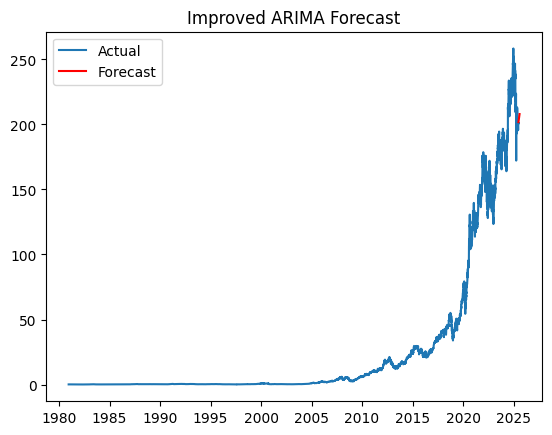

In [28]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Auto ARIMA
auto_model = auto_arima(data['Close'], seasonal=False, trace=True)
best_order = auto_model.order

# Fit model
model = ARIMA(data['Close'], order=best_order)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=30)

# Plot
plt.plot(data['Close'], label='Actual')
forecast.index = pd.date_range(data.index[-1], periods=30, freq='B')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Improved ARIMA Forecast'); plt.legend(); plt.show()


### Sarima

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=inf, Time=24.03 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=41093.734, Time=0.26 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=37630.472, Time=1.44 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=inf, Time=8.04 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=37629.822, Time=0.36 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=37630.361, Time=1.58 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=inf, Time=5.23 sec
 ARIMA(2,2,0)(0,0,0)[12]             : AIC=36642.183, Time=0.59 sec
 ARIMA(2,2,0)(1,0,0)[12]             : AIC=36638.534, Time=1.58 sec
 ARIMA(2,2,0)(2,0,0)[12]             : AIC=36619.132, Time=3.59 sec
 ARIMA(2,2,0)(2,0,1)[12]             : AIC=36619.776, Time=9.53 sec
 ARIMA(2,2,0)(1,0,1)[12]             : AIC=36625.597, Time=7.98 sec
 ARIMA(1,2,0)(2,0,0)[12]             : AIC=37616.524, Time=3.16 sec
 ARIMA(3,2,0)(2,0,0)[12]             : AIC=35970.756, Time=5.08 sec
 ARIMA(3,2,0)(1,0,0)[1

c:\Users\arjun\Desktop\ZIDIO INTERNSHIP\prj\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\arjun\Desktop\ZIDIO INTERNSHIP\prj\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\arjun\Desktop\ZIDIO INTERNSHIP\prj\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



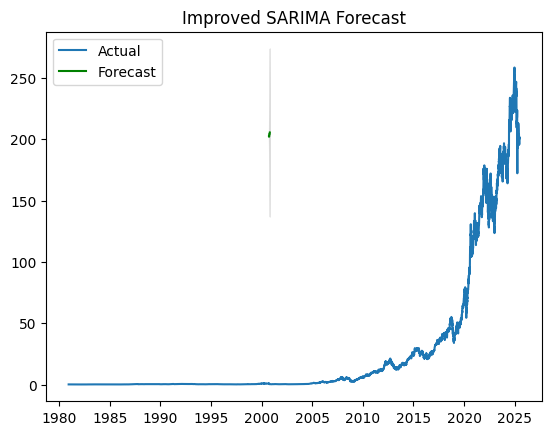

In [29]:
auto_model = auto_arima(data['Close'], seasonal=True, m=12, trace=True)
best_order = auto_model.order
best_seasonal = auto_model.seasonal_order

# Fit SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data['Close'], order=best_order, seasonal_order=best_seasonal)
model_fit = model.fit()

# Forecast
forecast = model_fit.get_forecast(steps=30)
forecast_ci = forecast.conf_int()

# Plot
plt.plot(data['Close'], label='Actual')
forecast.predicted_mean.plot(label='Forecast', color='green')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.1)
plt.title('Improved SARIMA Forecast'); plt.legend(); plt.show()


### Prophet

In [3]:
from prophet import Prophet

df = data.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
df['volume'] = data['Volume'].values

holidays = pd.DataFrame({
    'holiday': 'apple_event',
    'ds': pd.to_datetime(['2023-09-12', '2022-09-07']),
    'lower_window': 0,
    'upper_window': 1,
})

model = Prophet(holidays=holidays, changepoint_prior_scale=0.05)
model.add_regressor('volume')
model.fit(df)

future = model.make_future_dataframe(periods=365)
future['volume'] = data['Volume'].mean()

forecast = model.predict(future)

model.plot(forecast)
plt.title('Improved Prophet Forecast')
plt.show()


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# #Install Dependencies
# #USE - pip install pandas numpy matplotlib seaborn plotly scikit-learn statsmodels prophet tensorflow streamlit

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px
# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from prophet import Prophet
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error
# import streamlit as st

# # 📥 Load Data
# data = pd.read_csv('stock_data.csv')
# data['Date'] = pd.to_datetime(data['Date'])
# data.set_index('Date', inplace=True)

# # 📊 Visualize Trends
# plt.figure(figsize=(12,6))
# plt.plot(data['Close'])
# plt.title('Stock Price Over Time')
# plt.show()

# # 📏 ARIMA Forecasting
# model_arima = ARIMA(data['Close'], order=(5,1,0))
# result_arima = model_arima.fit()
# forecast_arima = result_arima.forecast(steps=30)

# # Calculate RMSE for ARIMA
# rmse_arima = np.sqrt(mean_squared_error(data['Close'][-30:], forecast_arima)) # Calculate RMSE for the last 30 data points


# # 📏 SARIMA Forecasting
# model_sarima = SARIMAX(data['Close'], order=(1,1,1), seasonal_order=(1,1,0,12))
# result_sarima = model_sarima.fit()
# forecast_sarima = result_sarima.forecast(30)

# # Calculate RMSE for SARIMA
# rmse_sarima = np.sqrt(mean_squared_error(data['Close'][-30:], forecast_sarima)) # Calculate RMSE for the last 30 data points

# # 📏 Prophet Forecasting
# prophet_df = data.reset_index()[['Date', 'Close']]
# prophet_df.columns = ['ds', 'y']
# model_prophet = Prophet()
# model_prophet.fit(prophet_df)
# future = model_prophet.make_future_dataframe(periods=30)
# forecast_prophet = model_prophet.predict(future)

# # Calculate RMSE for Prophet
# rmse_prophet = np.sqrt(mean_squared_error(data['Close'][-30:], forecast_prophet['yhat'][-30:]))  # Calculate RMSE for the last 30 data points

# # 📏 LSTM Forecasting
# scaler = MinMaxScaler(feature_range=(0,1))
# data_scaled = scaler.fit_transform(data[['Close']])

# X, y = [], []
# for i in range(60, len(data_scaled)):
#     X.append(data_scaled[i-60:i, 0])
#     y.append(data_scaled[i, 0])

# X, y = np.array(X), np.array(y)
# X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# model_lstm = Sequential()
# model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
# model_lstm.add(LSTM(units=50))
# model_lstm.add(Dense(1))

# model_lstm.compile(loss='mean_squared_error', optimizer='adam')
# model_lstm.fit(X, y, epochs=10, batch_size=32)

# # Make predictions for LSTM
# # Define scaled_data here, before it's used
# scaled_data = scaler.fit_transform(data[['Close']].values)  # Reshape if necessary
# train_size = int(len(scaled_data) * 0.8)
# train, test = scaled_data[:train_size], scaled_data[train_size:]


# def create_dataset(dataset, time_step=60):
#     X, Y = [], []
#     for i in range(len(dataset)-time_step-1):
#         X.append(dataset[i:(i+time_step), 0])
#         Y.append(dataset[i + time_step, 0])
#     return np.array(X), np.array(Y)

# time_step = 60
# _, X_test = create_dataset(test, time_step) # Recalculate X_test
# # The original line causing the error:
# # X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# # Reshape X_test to 3D, but with only one feature
# X_test = X_test.reshape(X_test.shape[0], 1, 1)


# inputs = data_scaled[len(data_scaled) - len(X_test) - 60:]
# inputs = inputs.reshape(-1, 1)
# inputs = scaler.transform(inputs)
# X_test_lstm = []
# for i in range(60, inputs.shape[0]):
#     X_test_lstm.append(inputs[i - 60:i, 0])
# X_test_lstm = np.array(X_test_lstm)
# X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

# lstm_predictions = model_lstm.predict(X_test_lstm)
# lstm_predictions = scaler.inverse_transform(lstm_predictions)


# # Calculate RMSE for LSTM
# rmse_lstm = np.sqrt(mean_squared_error(data['Close'][-30:], lstm_predictions[-30:]))  # Calculate RMSE for the last 30 data points



# # 📊 Streamlit Dashboard
# st.title("Stock Market Forecast Dashboard")
# st.line_chart(data['Close'])
# st.subheader("ARIMA Forecast")
# st.line_chart(forecast_arima)
# st.subheader("SARIMA Forecast")
# st.line_chart(forecast_sarima)
# st.subheader("Prophet Forecast")
# st.line_chart(forecast_prophet[['ds', 'yhat']].set_index('ds').tail(30))

# st.subheader("Model Accuracy (RMSE)")
# st.write(f'ARIMA RMSE: {rmse_arima:.2f}')
# st.write(f'SARIMA RMSE: {rmse_sarima:.2f}')
# st.write(f'Prophet RMSE: {rmse_prophet:.2f}')
# st.write(f'LSTM RMSE: {rmse_lstm:.2f}')

# st.success("All forecasts generated successfully!")